# Лабораторная работа №1

## Задание 1.
Реализуйте градиентный спуск с постоянным шагом. Исследуйте сходимость при разных значениях шага

Определим функцию, для которой будем выполнять задания

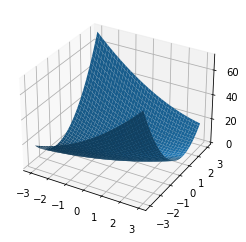

In [8]:
import numpy as np

import drawing
from graphic import F

F().draw()

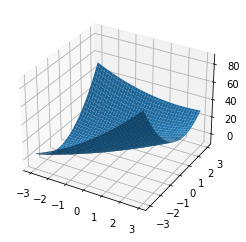

In [9]:
from graphic import G

g = G().draw()

/home/Vladislav.Kuznetsov/Vl/Projects/University/meth-opt/meth-opt-1/graphic.py:55: RuntimeWarning: overflow encountered in double_scalars
  return np.array([2 * x[0] - 3 * x[1], 8 * x[1] - 3 * x[0]])
/home/Vladislav.Kuznetsov/Vl/Projects/University/meth-opt/meth-opt-1/onedimsearch.py:17: RuntimeWarning: invalid value encountered in subtract
  return start - rate * vector


Const: Rate=0.19652173913043477 with 119 steps


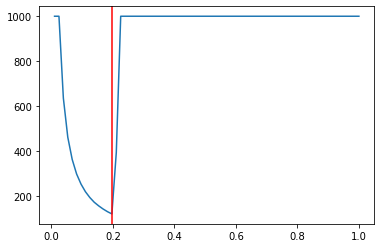

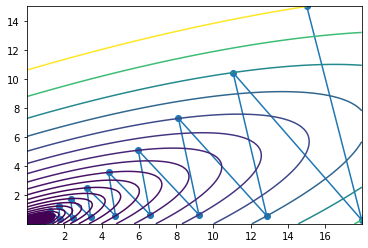

In [10]:
import gradient
import onedimsearch
import graphic

step_by_step_const_best = gradient.find_best_const_schedule(F(), onedimsearch.StepByStep(), 1000, 1e-7, np.array([15, 15]), True)
points = gradient.gradient_steps(F(), step_by_step_const_best, onedimsearch.StepByStep(), 1000, 1e-7, np.array([15, 15]))
drawing.draw_steps(points, True, F())

## Задание 2.
Подберите функцию изменения шага (learning rate scheduling), чтобы улучшить сходимость. Например экспоненциальную или ступенчатую.

Исследуем экспоненциально убывающий шаг.

Linear: Start=0.3010526315789474, Step=0.9925555555555555 with 114 steps


/home/Vladislav.Kuznetsov/Vl/Projects/University/meth-opt/meth-opt-1/graphic.py:55: RuntimeWarning: overflow encountered in double_scalars
  return np.array([2 * x[0] - 3 * x[1], 8 * x[1] - 3 * x[0]])
/home/Vladislav.Kuznetsov/Vl/Projects/University/meth-opt/meth-opt-1/onedimsearch.py:17: RuntimeWarning: invalid value encountered in subtract
  return start - rate * vector


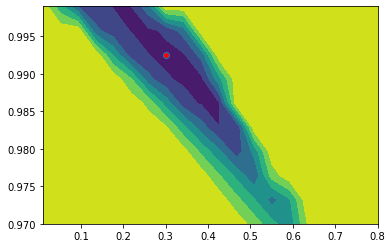

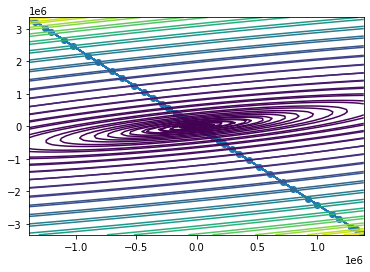

In [11]:
step_by_step_linear_best = gradient.find_best_linear_schedule(F(), onedimsearch.StepByStep(), 1000, 1e-7, np.array([15, 15]), True)
points = gradient.gradient_steps(F(), step_by_step_linear_best, onedimsearch.StepByStep(), 1000, 1e-7, np.array([15, 15]))
drawing.draw_steps(points, True, F())

Исследуем параболически убывающий шаг.

Parabaloic: K=44.46376811594203 with 2156 steps


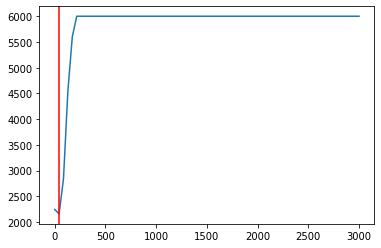

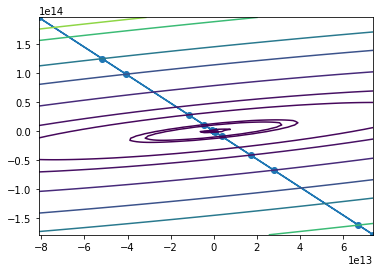

In [12]:
step_by_step_parabolic_best = gradient.find_best_parabolic_schedule(F(), onedimsearch.StepByStep(), 6000, 1e-7, np.array([15, 15]), True)
points = gradient.gradient_steps(F(), step_by_step_parabolic_best, onedimsearch.StepByStep(), 1000, 1e-7, np.array([15, 15]))
drawing.draw_steps(points, True, F())

## Задание 3.

Было выбрано золотое сечение

In [13]:
gold_split_const_best = gradient.find_best_const_schedule(F(), onedimsearch.GoldSplit(), 1000, 1e-5, np.array([15, 15]), False)
gold_split_linear_best = gradient.find_best_linear_schedule(F(), onedimsearch.GoldSplit(), 1000, 1e-5, np.array([15, 15]), False)
gold_split_parabolic_best = gradient.find_best_parabolic_schedule(F(), onedimsearch.GoldSplit(), 1000, 1e-5, np.array([15, 15]), False)

for name, step, gold in [
    ("Const", step_by_step_const_best, gold_split_const_best),
    ("Linear", step_by_step_linear_best, gold_split_linear_best),
    ("Parabolic", step_by_step_parabolic_best, gold_split_parabolic_best),
]:
    fun = F()
    count_step = gradient.gradient_steps(F(), step, onedimsearch.StepByStep(), 10000, 1e-5, np.array([15, 15]))
    gold_step = gradient.gradient_steps(fun, gold, onedimsearch.GoldSplit(), 10000, 1e-5, np.array([15, 15]))
    print(f'Compare {name}: {count_step.size // 2}g vs {gold_step.size // 2}g, {fun.count}f')

Compare Const: 91g vs 26g, 451f
Compare Linear: 585g vs 40g, 671f
Compare Parabolic: 1550g vs 23g, 539f


## Задание 4.

In [14]:
import wolfe_conditions

wolfe_conditions.wolfe_analyzing(False)

creating analyzing data for F() function, c_1 in range [1e-7, 0.8], c_2 in range [0.1, 0.99]
got analyzed data
minimal iteration number with c_1=1e-07 c_2=0.1 iteration=65


<img src="wolfe_condition_analysis.gif" width="750" align="center">

## Задание 5.

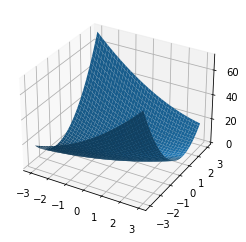

<class 'onedimsearch.StepByStep'>
find_best_const_schedule


/home/Vladislav.Kuznetsov/Vl/Projects/University/meth-opt/meth-opt-1/graphic.py:55: RuntimeWarning: overflow encountered in double_scalars
  return np.array([2 * x[0] - 3 * x[1], 8 * x[1] - 3 * x[0]])
/home/Vladislav.Kuznetsov/Vl/Projects/University/meth-opt/meth-opt-1/onedimsearch.py:17: RuntimeWarning: invalid value encountered in subtract
  return start - rate * vector


91


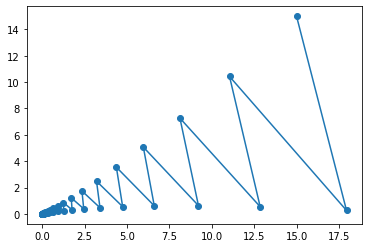

find_best_linear_schedule
65


/home/Vladislav.Kuznetsov/Vl/Projects/University/meth-opt/meth-opt-1/graphic.py:55: RuntimeWarning: overflow encountered in double_scalars
  return np.array([2 * x[0] - 3 * x[1], 8 * x[1] - 3 * x[0]])
/home/Vladislav.Kuznetsov/Vl/Projects/University/meth-opt/meth-opt-1/onedimsearch.py:17: RuntimeWarning: invalid value encountered in subtract
  return start - rate * vector


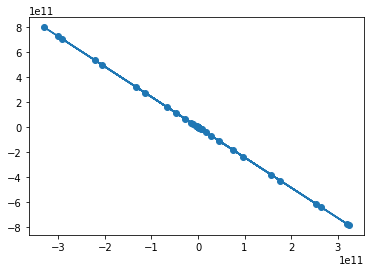

find_best_parabolic_schedule
1550


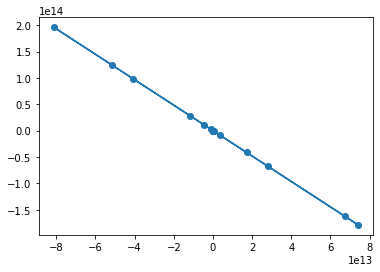

<class 'onedimsearch.GoldSplit'>
find_best_const_schedule
26


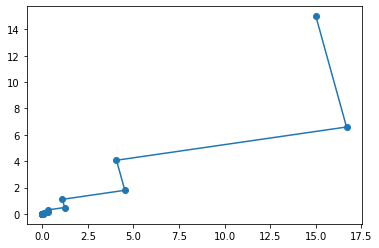

find_best_linear_schedule
40


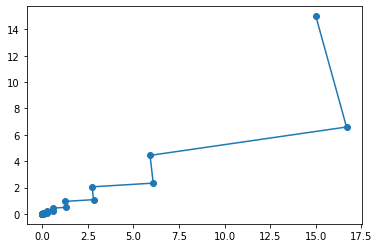

find_best_parabolic_schedule
23


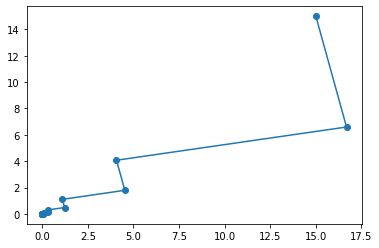

<class 'onedimsearch.WolfeCondition'>
find_best_const_schedule
98


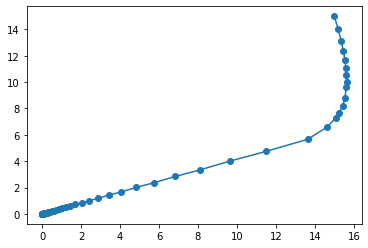

find_best_linear_schedule
98


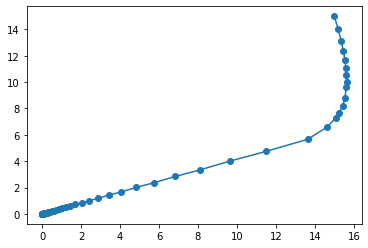

find_best_parabolic_schedule
98


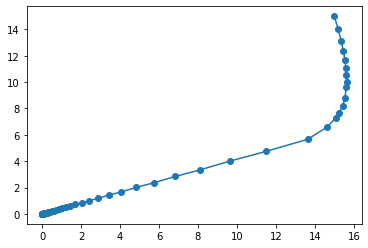

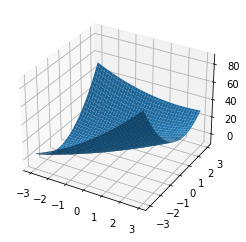

<class 'onedimsearch.StepByStep'>
find_best_const_schedule


/home/Vladislav.Kuznetsov/Vl/Projects/University/meth-opt/meth-opt-1/graphic.py:67: RuntimeWarning: overflow encountered in double_scalars
  return np.array([2 * x[0] - 3 * x[1] + 5, 8 * x[1] - 3 * x[0] - 1])
/home/Vladislav.Kuznetsov/Vl/Projects/University/meth-opt/meth-opt-1/onedimsearch.py:17: RuntimeWarning: invalid value encountered in subtract
  return start - rate * vector


92


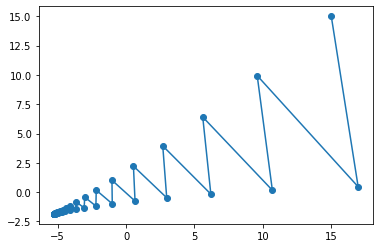

find_best_linear_schedule
65


/home/Vladislav.Kuznetsov/Vl/Projects/University/meth-opt/meth-opt-1/graphic.py:67: RuntimeWarning: overflow encountered in double_scalars
  return np.array([2 * x[0] - 3 * x[1] + 5, 8 * x[1] - 3 * x[0] - 1])
/home/Vladislav.Kuznetsov/Vl/Projects/University/meth-opt/meth-opt-1/onedimsearch.py:17: RuntimeWarning: invalid value encountered in subtract
  return start - rate * vector


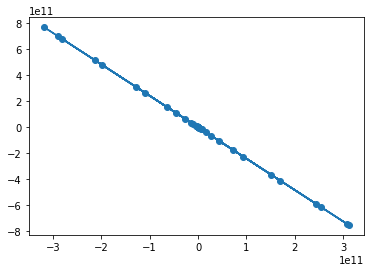

find_best_parabolic_schedule
1584


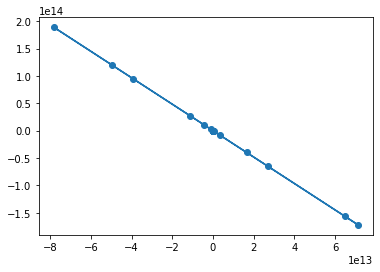

<class 'onedimsearch.GoldSplit'>
find_best_const_schedule
34


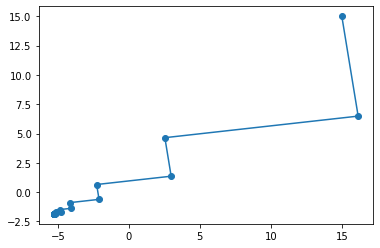

find_best_linear_schedule
43


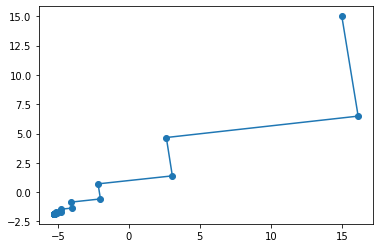

find_best_parabolic_schedule
31


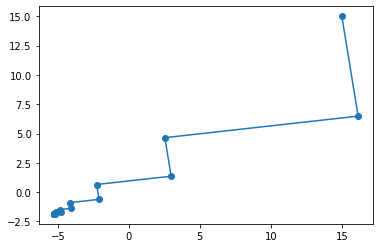

<class 'onedimsearch.WolfeCondition'>
find_best_const_schedule
98


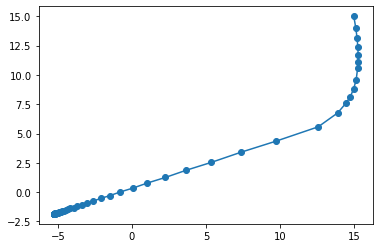

find_best_linear_schedule
98


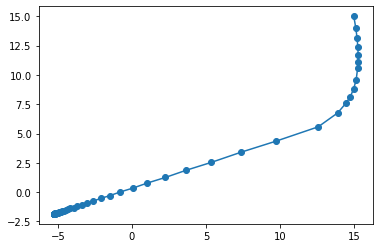

find_best_parabolic_schedule
98


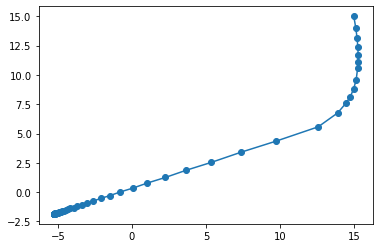

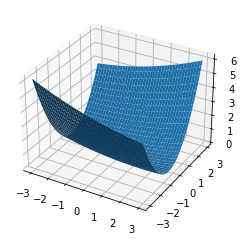

<class 'onedimsearch.StepByStep'>
find_best_const_schedule
194


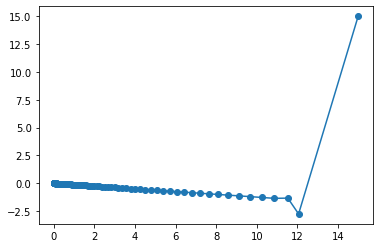

find_best_linear_schedule
279


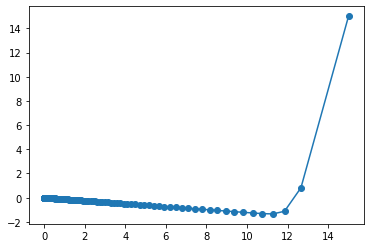

find_best_parabolic_schedule
<class 'onedimsearch.GoldSplit'>
find_best_const_schedule
202


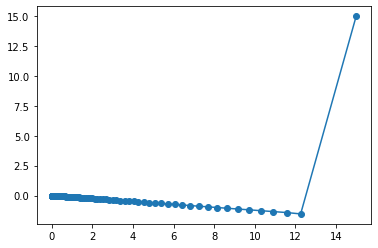

find_best_linear_schedule
307


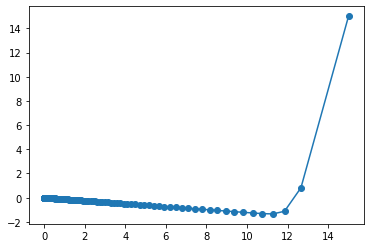

find_best_parabolic_schedule
10


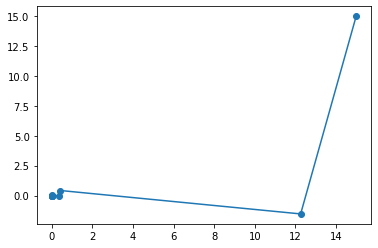

<class 'onedimsearch.WolfeCondition'>
find_best_const_schedule
128


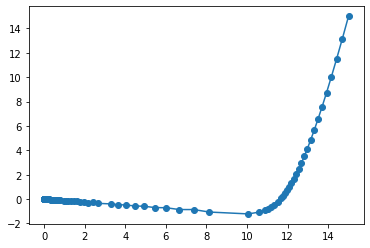

find_best_linear_schedule
128


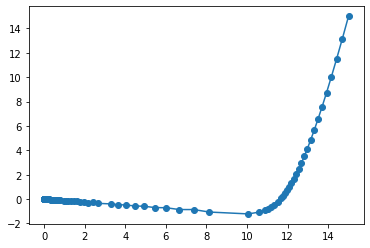

find_best_parabolic_schedule
128


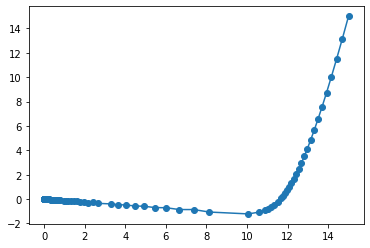

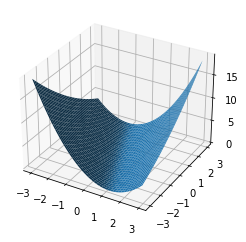

<class 'onedimsearch.StepByStep'>
find_best_const_schedule


/home/Vladislav.Kuznetsov/Vl/Projects/University/meth-opt/meth-opt-1/onedimsearch.py:17: RuntimeWarning: invalid value encountered in subtract
  return start - rate * vector


1146


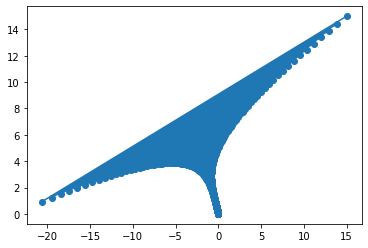

find_best_linear_schedule
find_best_parabolic_schedule
<class 'onedimsearch.GoldSplit'>
find_best_const_schedule
1127


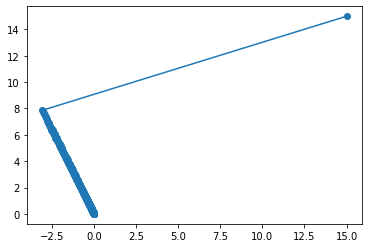

find_best_linear_schedule
find_best_parabolic_schedule
7


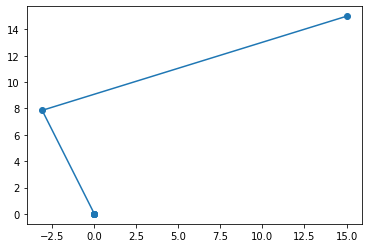

<class 'onedimsearch.WolfeCondition'>
find_best_const_schedule
256


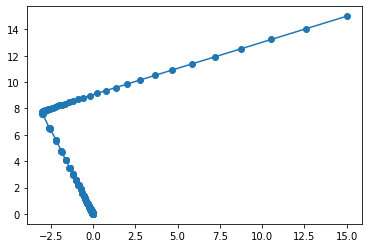

find_best_linear_schedule
256


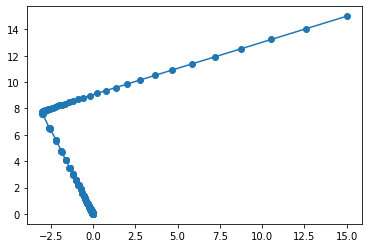

find_best_parabolic_schedule
256


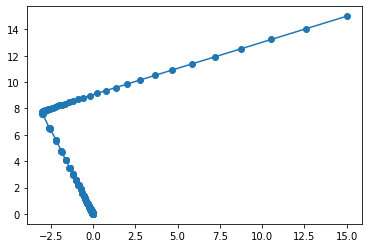

In [15]:
graphics = [graphic.F(), graphic.G()]

for _ in range(2):
    graphics.append(graphic.RandomGraphic(2))

for g in graphics:
    g.draw()
    for search_method in [onedimsearch.StepByStep(), onedimsearch.GoldSplit(), onedimsearch.WolfeCondition()]:
        print(search_method.__class__)
        for type_best in [gradient.find_best_const_schedule, gradient.find_best_linear_schedule,
                          gradient.find_best_parabolic_schedule]:
            print(type_best.__name__)
            best = gradient.binary_rises(
                g,
                search_method,
                1e-5,
                np.array([15, 15]),
                10000,
                type_best
            )
            if best is None:
                continue
            points = gradient.gradient_steps(g, best, search_method, 10000, 1e-5, np.array([15, 15]))
            print(points.shape[0])
            drawing.draw_steps(points, False, g)

## Задание 6.

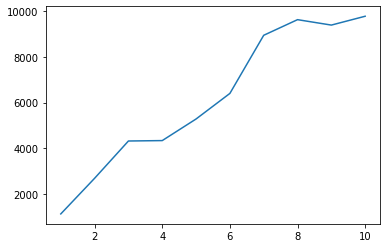

In [16]:
gradient.test_different_argument_count(onedimsearch.GoldSplit(), 10000, 100, 1e-5)